In [114]:
import xarray as xr
import numpy as np
from os.path import join
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from scipy.spatial import Voronoi, voronoi_plot_2d, cKDTree

In [10]:
DATA_DIR = "/Users/shazarika/ProjectSpace/currentProjects/AiBEDO/codebase/aibedo_demo_data"
order6_data_fn = 'compress.isosph.CESM2.historical.r1i1p1f1.Input.Exp8_fixed.nc'


In [11]:
ds = xr.open_dataset(join(DATA_DIR, order6_data_fn))

#### Breakdown of different levels
- level-0(2**0=1): 12 vertices
- level-1(2**1=2): 42 vertices
- level-2(2**2=4): 162 vertices
- level-3(2**3=8): 642 vertices
- level-4(2**4=16): 2562 vertices
- level-5(2**5=32): 10242 vertices
- level-6(2**6=64): 40962 vertices

In [12]:
lon_l6 = ds.lon.data
lat_l6 = ds.lat.data

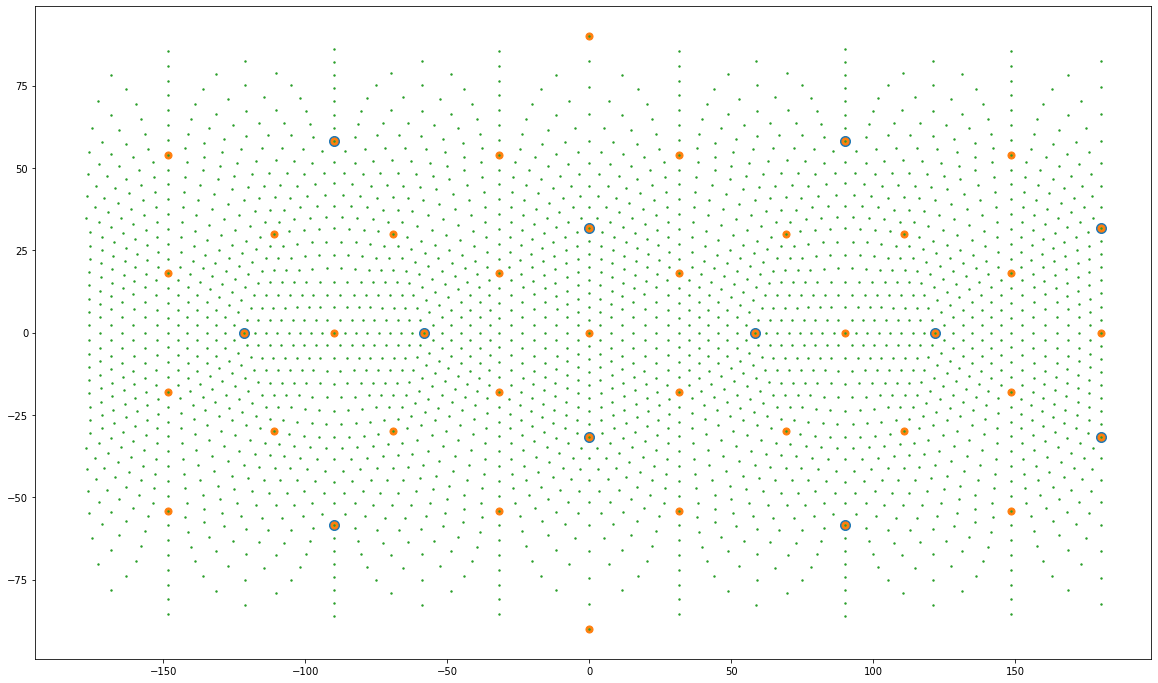

In [29]:
plt.figure(figsize=(20,12))
plt.scatter(x=lon_l6[:12], y=lat_l6[:12], s=100)
plt.scatter(x=lon_l6[:42], y=lat_l6[:42], s=50)
plt.scatter(x=lon_l6[:2562], y=lat_l6[:2562], s=2)

In [138]:
base_point_array_l1 = np.vstack((lon_l6[:42], lat_l6[:42])).T

### test voronoi tesselation of the points around the base points

In [139]:
vor = Voronoi(base_point_array_l1)

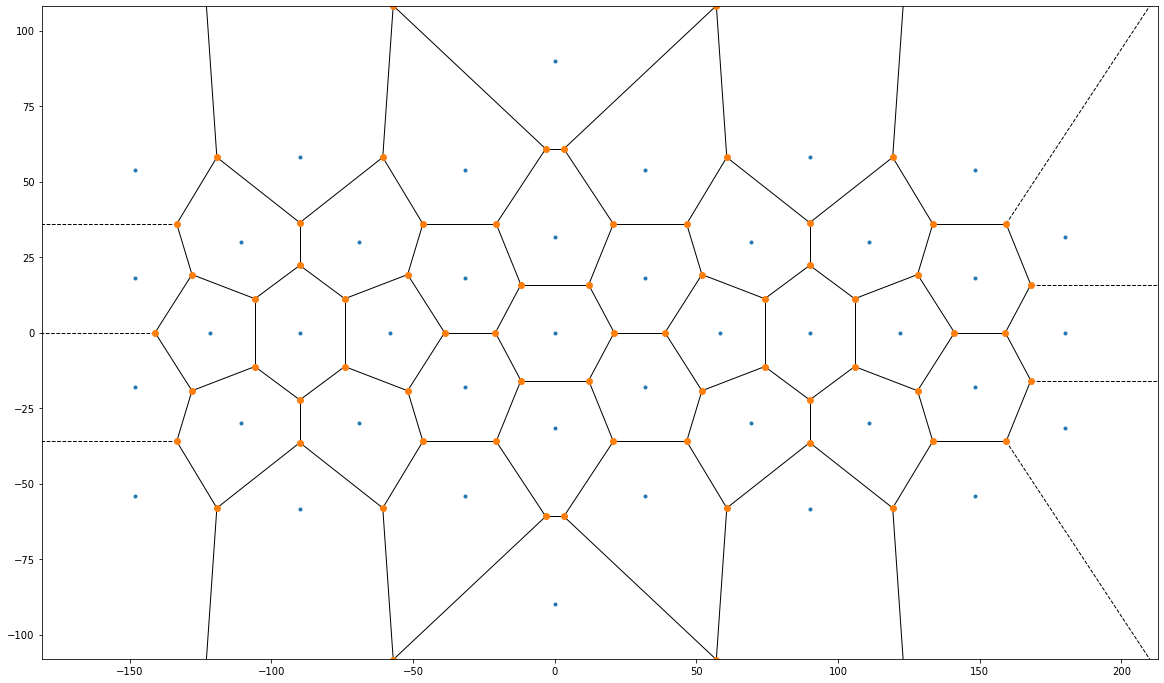

In [140]:
plt.rcParams['figure.figsize'] = [20,12]
voronoi_plot_2d(vor)

plt.show()

In [141]:
vor.regions

[[],
 [9, 7, 6, 0, -1, 2, 8],
 [13, 11, -1, 12],
 [12, 4, 1, -1],
 [16, -1, 11, 14],
 [15, 5, 13, 11, 14],
 [17, 0, -1, 16],
 [20, 17, 0, 6, 19],
 [21, 15, 14, 16, 17, 20],
 [27, 24, 25, 22, 23, 26],
 [25, 5, 15, 21, 18, 22],
 [25, 5, 13, 12, 4, 24],
 [27, 3, 1, 4, 24],
 [31, 19, 6, 7, 28],
 [30, 18, 22, 23, 29],
 [31, 19, 20, 21, 18, 30],
 [39, 32, 9, 8, 38],
 [45, 41, 40, 43, 42, 44],
 [43, 36, 37, 39, 38, 42],
 [44, 2, 8, 38, 42],
 [45, 10, -1, 2, 44],
 [48, 34, 41, 40, 46],
 [52, 3, 27, 26, 50],
 [55, -1, 53, 54],
 [54, 34, 41, 45, 10, 53],
 [-1, 10, 53],
 [55, 35, -1],
 [55, 35, 47, 48, 34, 54],
 [57, 46, 40, 43, 36, 56],
 [58, 33, 37, 36, 56],
 [65, 62, 60, 61, 63, 64],
 [61, 32, 39, 37, 33, 60],
 [62, 49, 59, 58, 33, 60],
 [63, 28, 7, 9, 32, 61],
 [65, 50, 52, 51, 49, 62],
 [64, 29, 30, 31, 28, 63],
 [65, 50, 26, 23, 29, 64],
 [70, 68, 67, 66, 69],
 [67, 57, 46, 48, 47, 66],
 [69, -1, 35, 47, 66],
 [68, 59, 58, 56, 57, 67],
 [70, 51, 49, 59, 68],
 [70, 51, 52, 3, 1, -1, 69]]

### cKD tree partitions

In [155]:
#highest resolution to query for
query_array = np.vstack((lon_l6[:], lat_l6[:])).T

def cKDT_based_partitions(base_points):
    voronoi_kdtree = cKDTree(base_points)
    test_point_dist, test_point_regions = voronoi_kdtree.query(query_array)
    return test_point_regions

def visualize_partitions(base_points, labels, title):
    plt.figure(figsize=(15,8))
    plt.scatter(x=base_points[:,0], y=base_points[:,1], s=20)
    plt.scatter(x=lon_l6[:], y=lat_l6[:], s=2, c=labels, cmap=plt.get_cmap('flag'))
    plt.title(title)
    plt.show()

In [144]:
l1_labels = cKDT_based_partitions(base_point_array_l1)

In [149]:
base_point_array_l0 = np.vstack((lon_l6[:12], lat_l6[:12])).T
l0_labels = cKDT_based_partitions(base_point_array_l0)

base_point_array_l2 = np.vstack((lon_l6[:162], lat_l6[:162])).T
l2_labels = cKDT_based_partitions(base_point_array_l2)

base_point_array_l3 = np.vstack((lon_l6[:642], lat_l6[:642])).T
l3_labels = cKDT_based_partitions(base_point_array_l3)

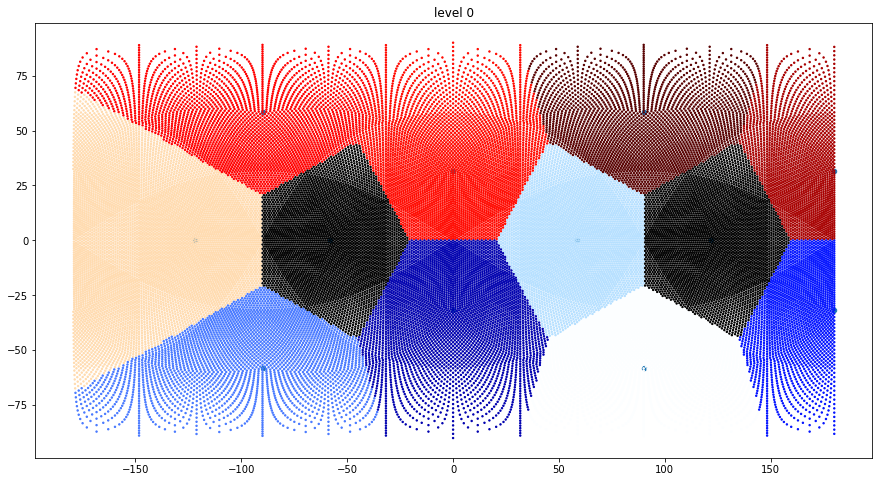

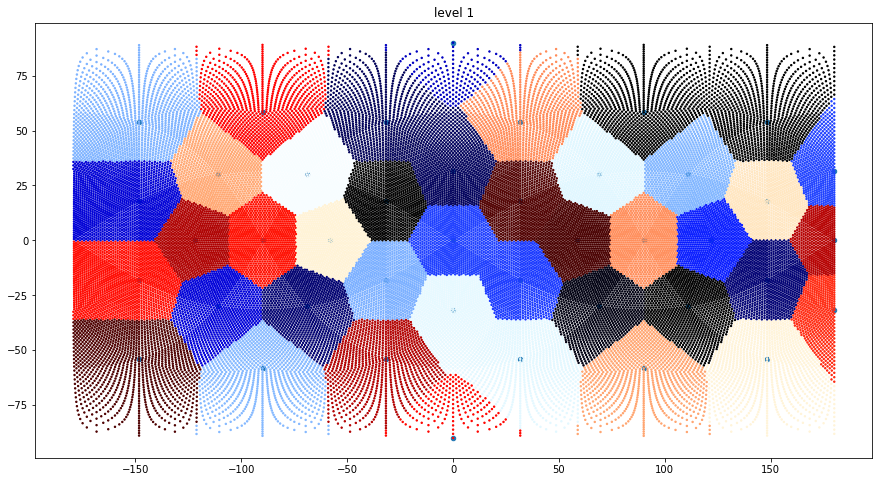

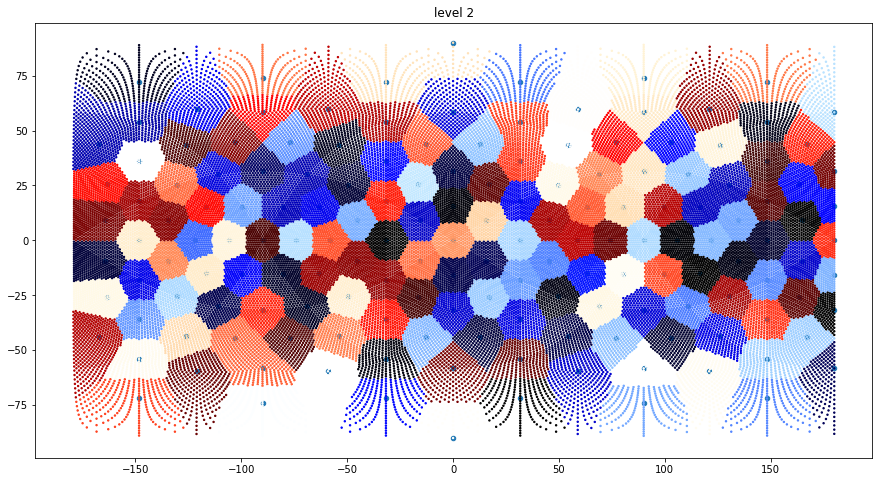

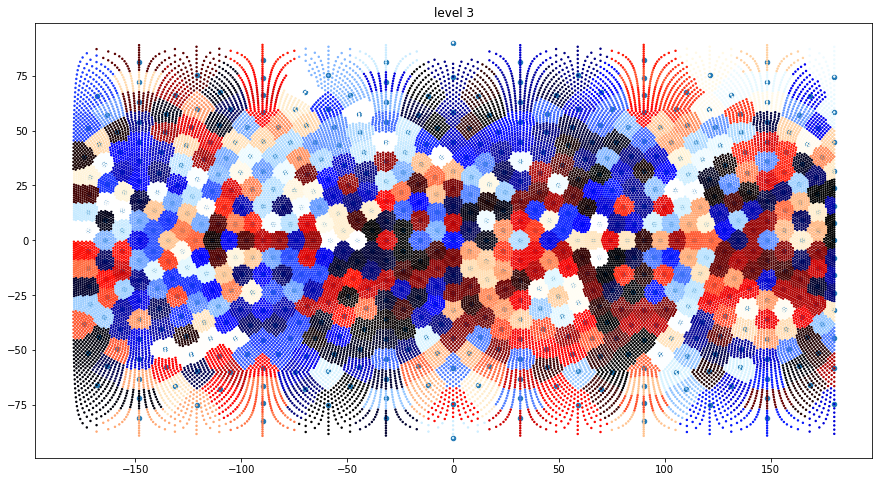

In [156]:
visualize_partitions(base_point_array_l0, l0_labels, "level 0")
visualize_partitions(base_point_array_l1, l1_labels, "level 1")
visualize_partitions(base_point_array_l2, l2_labels, "level 2")
visualize_partitions(base_point_array_l3, l3_labels, "level 3")


In [163]:
import pandas as pd

In [165]:
#create parition information dataframe
def get_lat_lon_partition_df(lat, lon, pid):
    new_array = np.vstack((lat, lon, pid))
    column_name = ['lat', 'lon', 'pid']
    # creating the dataframe
    new_df = pd.DataFrame(data = new_array.T, columns = column_name)
    
    return new_df

In [168]:
l0_pid_df = get_lat_lon_partition_df(lat_l6, lon_l6, l0_labels)
l1_pid_df = get_lat_lon_partition_df(lat_l6, lon_l6, l1_labels)
l2_pid_df = get_lat_lon_partition_df(lat_l6, lon_l6, l2_labels)
l3_pid_df = get_lat_lon_partition_df(lat_l6, lon_l6, l3_labels)

<AxesSubplot:>

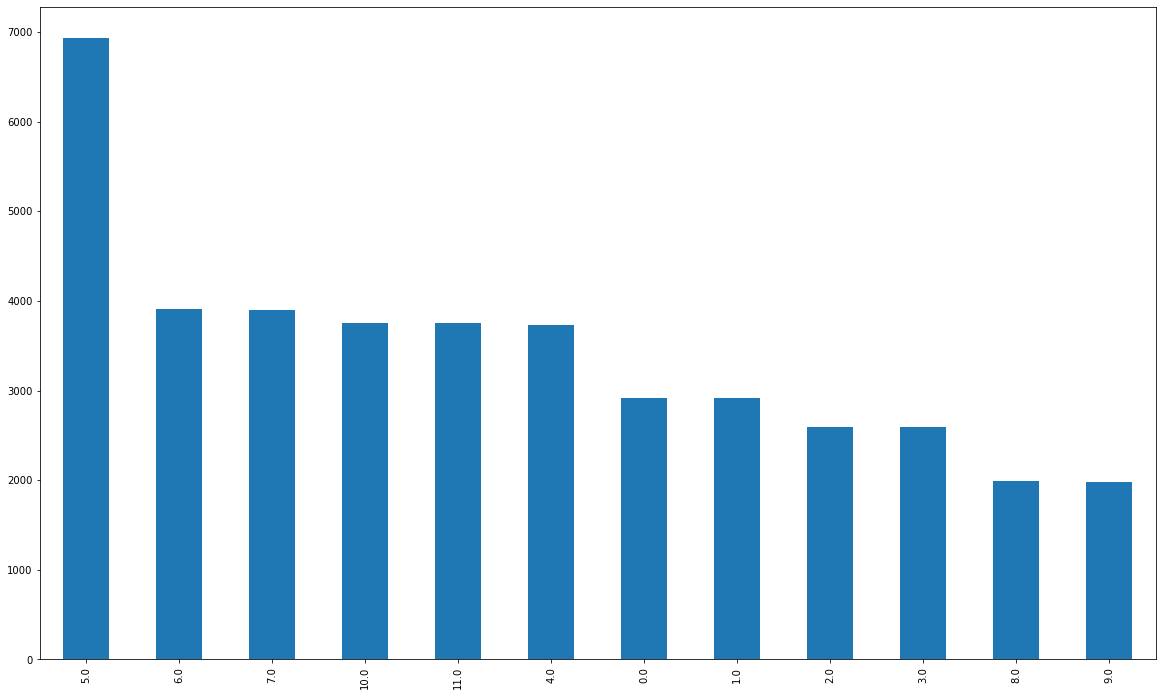

In [170]:
fig, ax = plt.subplots()
l0_pid_df['pid'].value_counts().plot(ax=ax, kind='bar')

<AxesSubplot:>

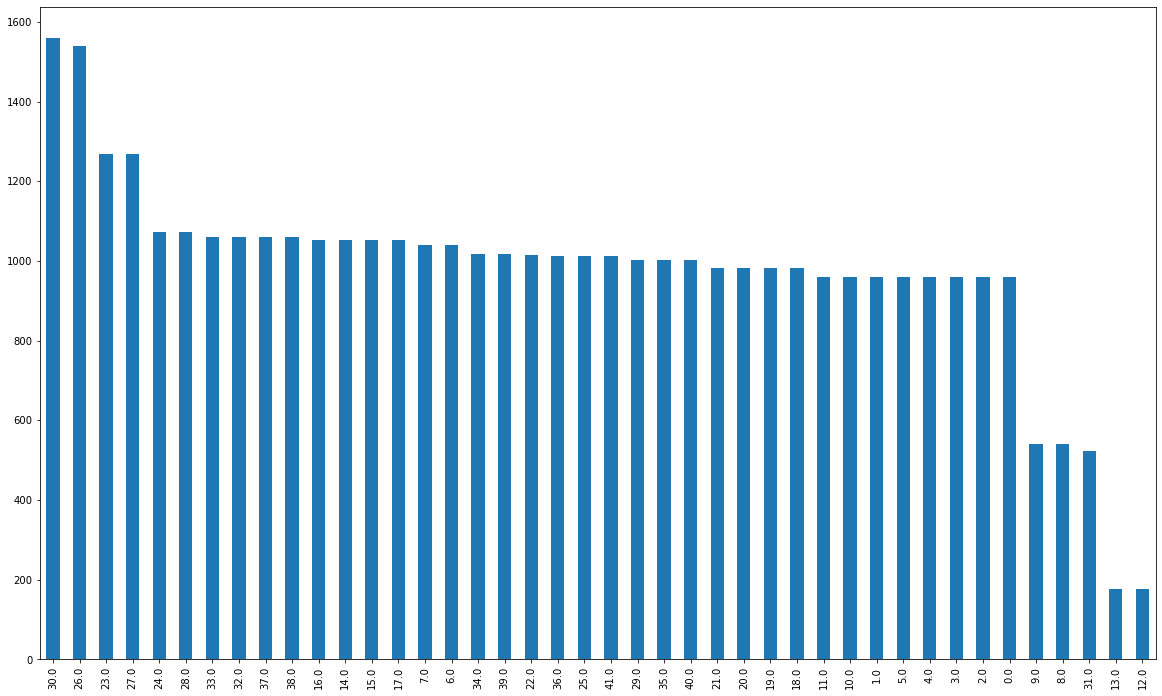

In [171]:
fig, ax = plt.subplots()
l1_pid_df['pid'].value_counts().plot(ax=ax, kind='bar')

<AxesSubplot:>

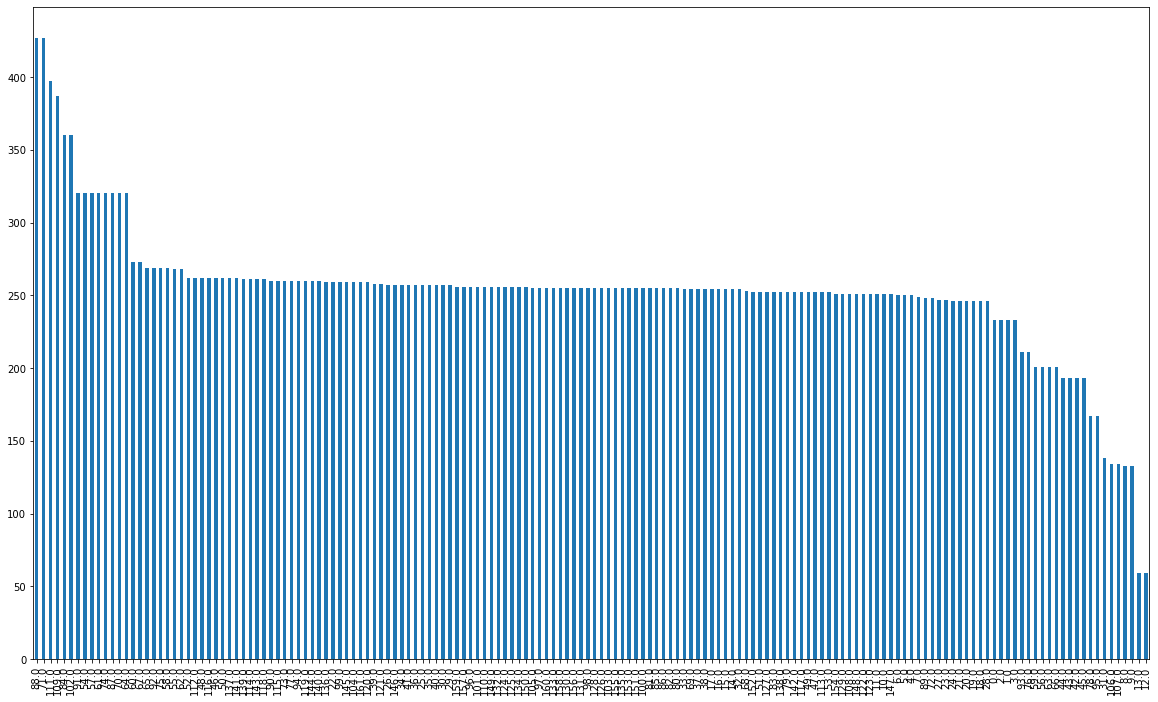

In [172]:
fig, ax = plt.subplots()
l2_pid_df['pid'].value_counts().plot(ax=ax, kind='bar')

<AxesSubplot:>

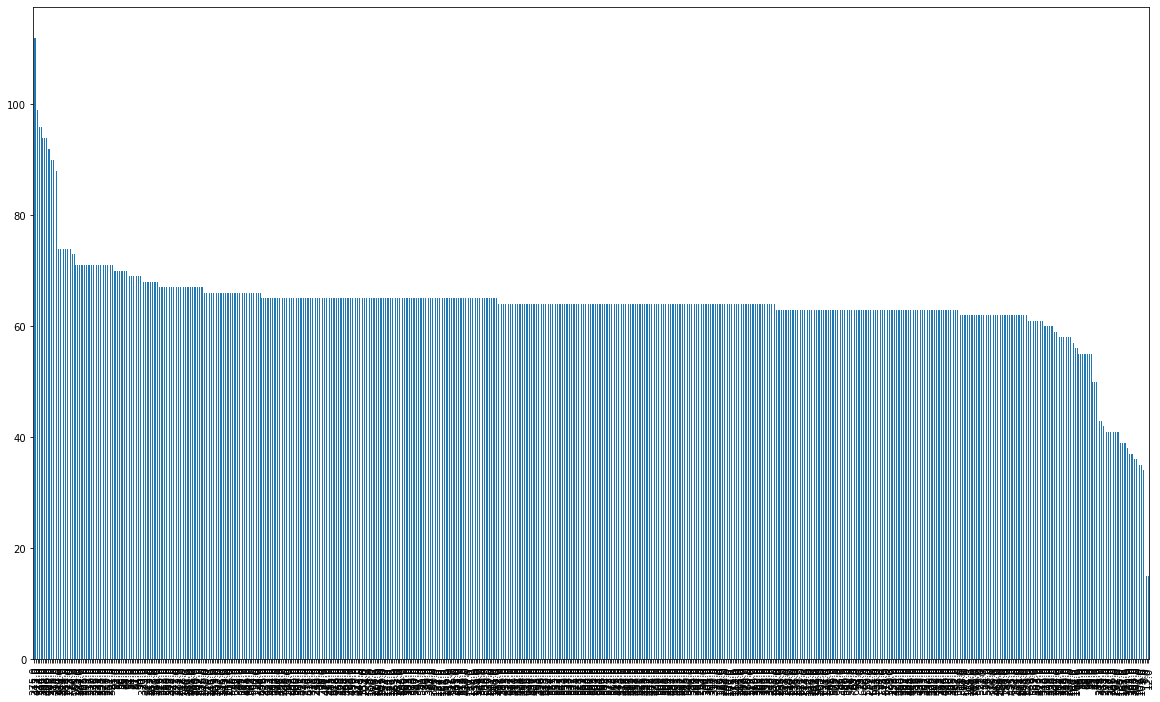

In [173]:
fig, ax = plt.subplots()
l3_pid_df['pid'].value_counts().plot(ax=ax, kind='bar')